<a href="https://colab.research.google.com/github/Hyebin1022/Demo/blob/main/2_%EC%B9%B4%ED%8E%98%EB%B3%84%EB%8C%80%ED%91%9C%EC%83%89%EC%83%81%ED%8A%9C%ED%94%8C%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = "/content/drive/MyDrive/data/"

In [ ]:
import pandas as pd
# 데이터 로드
df = pd.read_csv(f"{DATA_PATH}cafe_pick_4colors.csv")

df.head()

,Cafe Name,Color 1,Color 2,Color 3,Color 4
0,17도씨,"(151, 115, 90)","(24, 19, 17)","(224, 209, 187)","(191, 182, 175)"
1,1984,"(177, 172, 168)","(39, 44, 47)","(86, 60, 50)","(133, 93, 67)"
2,943_킹스크로스CAFE,"(83, 65, 51)","(163, 156, 116)","(84, 74, 56)","(215, 198, 178)"
3,공미학_마포홍대점,"(140, 122, 113)","(41, 35, 33)","(184, 182, 192)","(180, 170, 156)"
4,공상온도,"(107, 88, 74)","(181, 186, 179)","(146, 161, 184)","(105, 89, 78)"


In [ ]:
# 문자열을 float 튜플로 변환하는 함수 정의
def convert_to_float_tuple(rgb_string):
    # 문자열에서 괄호 제거 후 ','로 분리, float로 변환
    return tuple(map(float, rgb_string.strip("()").split(", ")))

In [ ]:
# 모든 RGB 값을 리스트로 변환
data = []
for i, row in df.iterrows():
    data.extend([
        convert_to_float_tuple(row["Color 1"]),
        convert_to_float_tuple(row["Color 2"]),
        convert_to_float_tuple(row["Color 3"]),
        convert_to_float_tuple(row["Color 4"]),
    ])

In [ ]:
len(data)

300

In [ ]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,073 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and dire

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# 2. 사용자 정의 클러스터 중심값 (노란색, 초록색, 파란색, 핑크색)
user_defined_colors = [
    (200, 200, 100),#(255, 255, 0),    # 노란색
    (100, 180, 100),#(0, 255, 0),      # 초록색
    (100, 150, 200),#(0, 0, 255),      # 파란색
    (200, 50, 50),#(200, 130, 180)#(255, 105, 180)   # 핑크색
]

In [ ]:
# 3. 나머지 클러스터는 랜덤 초기화
n_clusters = 4
remaining_clusters = n_clusters - len(user_defined_colors)

# 기존 데이터에서 랜덤하게 선택된 초기 중심값 추가
random_centroids = np.random.choice(len(data), remaining_clusters, replace=False)
random_centroids = [data[i] for i in random_centroids]

In [ ]:
# 초기 중심값 합치기
initial_centroids = np.array(user_defined_colors + random_centroids)

# 4. K-Means 실행
kmeans = KMeans(n_clusters=n_clusters, init=initial_centroids, n_init=1, random_state=42)
data_array = np.array(data)
kmeans.fit(data_array)



KMeans(init=array([[200, 200, 100],
       [100, 180, 100],
       [100, 150, 200],
       [200,  50,  50]]),
       n_clusters=4, n_init=1, random_state=42)

In [ ]:
# 기존 클러스터 중심값에 지정된 색상을 강제로 추가
adjusted_centroids = list(kmeans.cluster_centers_)

# 사용자 지정 색상을 포함
for custom_color in user_defined_colors:
    adjusted_centroids.append(custom_color)

# 최종 중심값 출력
print("조정된 대표 색상 (RGB):")
for idx, center in enumerate(adjusted_centroids):
    print(f"색상 {idx + 1}: {tuple(map(int, center))}")

조정된 대표 색상 (RGB):
색상 1: (202, 195, 183)
색상 2: (122, 102, 79)
색상 3: (157, 156, 151)
색상 4: (63, 51, 39)
색상 5: (200, 200, 100)
색상 6: (100, 180, 100)
색상 7: (100, 150, 200)
색상 8: (200, 50, 50)


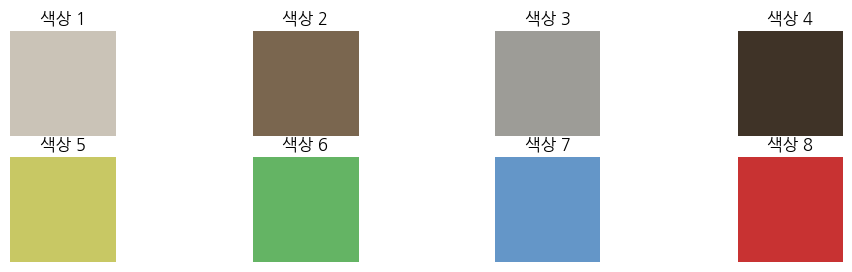

In [ ]:
# 6. 시각화
plt.figure(figsize=(12, 3))
for i, color in enumerate(adjusted_centroids):
    # Calculate the number of rows and columns for subplots to accommodate all centroids
    num_rows = int(np.ceil(len(adjusted_centroids) / n_clusters))  # Calculate rows needed

    # Use plt.subplot with calculated rows and n_clusters columns
    plt.subplot(num_rows, n_clusters, i + 1)

    # Convert color to a NumPy array and then perform division
    color_array = np.array(color) / 255  # Convert to array and normalize

    plt.imshow([[color_array]])  # Display the normalized color
    plt.axis('off')
    plt.title(f"색상 {i + 1}")
plt.show()

In [ ]:
# 여러 클러스터 수에 대해 SSE 계산
sse = []
for k in range(1, 30):  # 클러스터 개수를 1~20까지 테스트
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

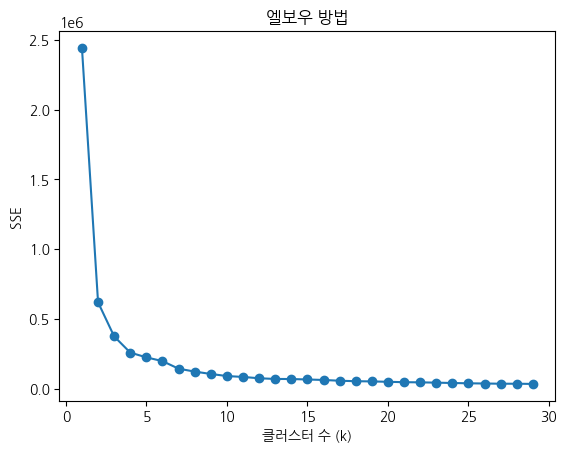

In [ ]:
# 결과 시각화
plt.plot(range(1, 30), sse, marker='o')  # Changed range to match the length of sse
plt.xlabel('클러스터 수 (k)')
plt.ylabel('SSE')
plt.title('엘보우 방법')
plt.show()

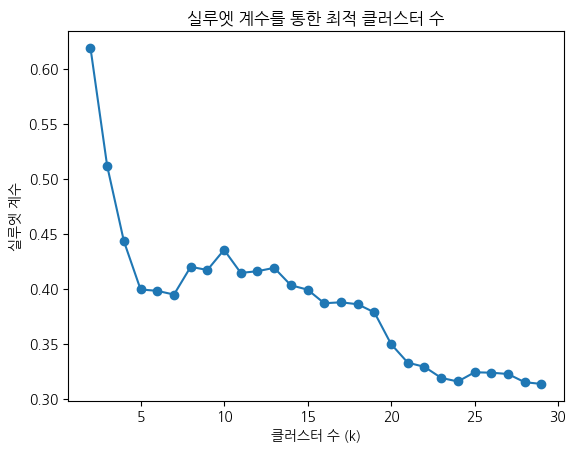

In [ ]:
from sklearn.metrics import silhouette_score

# 실루엣 계수 계산
silhouette_scores = []
for k in range(2, 30):  # 클러스터 개수를 2~20까지 테스트
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

# 결과 시각화
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.xlabel('클러스터 수 (k)')
plt.ylabel('실루엣 계수')
plt.title('실루엣 계수를 통한 최적 클러스터 수')
plt.show()

In [ ]:
# RGB 색상 간의 유클리디안 거리 계산 함수
def euclidean_distance(color1, color2):
    return np.sqrt(sum((np.array(color1) - np.array(color2))**2))

In [ ]:
# 그룹 A 색상과 그룹 B 색상 리스트
group_A = [
    (202, 195, 183), (122, 102, 79), (157, 156, 151), (63, 51, 39)
]
group_B = [
    (200, 200, 100), (100, 180, 100), (100, 150, 200), (200, 50, 50)
]

In [ ]:
# 4개 단위로 나누어 그룹 A와 그룹 B의 대표 색상과 유사도가 높은 색상 쌍을 생성
pairs = []
print(len(data))
for i in range(0, len(data), 4):
    color_block = data[i:i+4]

    # 그룹 A 색상 중에서 가장 유사한 색상 찾기
    closest_a_color = min(group_A, key=lambda x: min(euclidean_distance(x, color) for color in color_block))

    # 그룹 B 색상 중에서 가장 유사한 색상 찾기
    closest_b_color = min(group_B, key=lambda x: min(euclidean_distance(x, color) for color in color_block))

    # 유사한 색상 쌍 추가
    pair = (closest_a_color, closest_b_color)
    pairs.append(pair)

# 결과 확인
print(len(pairs))
for pair in pairs[:5]:  # 처음 5개 쌍만 출력
    print(pair)



300
75
((202, 195, 183), (200, 200, 100))
((122, 102, 79), (200, 200, 100))
((202, 195, 183), (200, 200, 100))
((202, 195, 183), (200, 200, 100))
((122, 102, 79), (100, 150, 200))


In [ ]:
df['colors'] = pairs

In [ ]:
output_csv = "cafe_list_with_colors.csv"
df.to_csv(output_csv, index=False, encoding='utf-8-sig')